In [1]:
import numpy as np # linear algebra
import pandas as pd # Series and DataFrames
import scipy.stats as stats # this is for point-biserial correlation
import sklearn.linear_model
import plotly.subplots as sp 
import plotly.graph_objects as go

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

In [2]:
heart_disease = pd.read_csv("heart_disease_cleaned.csv")

In [3]:
heart_disease.head()

,Unnamed: 0,HeartDisease,Stroke,DiffWalking,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Diabetic_No,...,SleepTime_Enough sleepers,SleepTime_Excellent Sleepers,SleepTime_Long Sleepers,Smoker_Drinker,Only_Smoker,Only_Drinker,healthy_nonDrinker_nonSmoker,AgeCategory_young,AgeCategory_MiddleAge,AgeCategory_Senior
0,0,False,False,False,True,4,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,1,False,True,False,True,4,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
2,2,False,False,False,True,2,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,3,False,False,False,False,3,False,False,True,True,...,True,False,False,False,False,True,False,False,False,True
4,4,False,False,True,True,4,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False


In [4]:
heart_disease.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
heart_disease.head().T

,0,1,2,3,4
HeartDisease,False,False,False,False,False
Stroke,False,True,False,False,False
DiffWalking,False,False,False,False,True
PhysicalActivity,True,True,True,False,True
GenHealth,4,4,2,3,4
Asthma,True,False,True,False,False
KidneyDisease,False,False,False,False,False
SkinCancer,True,False,False,True,False
Diabetic_No,False,True,False,True,True
"Diabetic_No, borderline diabetes",False,False,False,False,False


***
To Do List:

1.  Data smapling:
- Our data is imbalanced, so I decided to use stratified sampling to ensure training and validation sets maintain the same class distribution as the original dataset. Also later will use Startified K-fold cross-validation to assess the performance of the model across multiple folds.
- feature selection: I already did the feature selection

2.  Partition and Sampling :
- Validation Strategy : Stratified k-fold cross-validation 
- Partitioning should be Guided to maintain the similar distribution for the target in both sets
- Resampling : Although in this usecase I don't want to do this and want to keep it simple, if there is more time I would do synthetic sampling (Synthetic Minority over-sampling technique or SMOTE). But for now I don't want to use it.
- Definition of evaluation metric: As both FALSE POSITIVE and FALSE NEGATIVE are important and a balance needed for the data to perform well, I would choose the F1-Score to balance between precision adn recall

3. Partitionaing and sampling

    - Base Model: for base model I would use logistic regression which is the simplest one for binary classification
    later if I have time I will do the two following as well:

            1. K-Nearest Neighbours (KNN) - simple yet effective , especially when local patterns are important, and it adapts well to different data distributions
            2. Support Vector Machines(SVM): useful for high-dimensional spaces and cases with clear margin seperation
    - Chosen Algorithms are:
 1. Random Forrest: Robust to noise, handles non-linearity well and provides feature importance
 2. Gradient Boosting: XGBOOS - Ensemble technique for imbalance datasets and incorporate regularization

4.  Model Optimization
- Chosen Algorithms are:
 1. Hyperparameter Optimization:Although Random Search method does not guarantee the comprehensive and exhustive coverage of hyperparameter space but it is less costly than the gridsearch which choose a systematice approach to explore hyperparameters
 2. Ensemble algorithms: I use logistic regression at first then try:
 -  random forrest
 - Support Vector Machines
 - KNN
5. Model Selection and Evaluation
As our heart disease data is imbalance, I would do recalibration by using Platt scaling or isotonic regression. It depend one the differnce between real and predicted outcome difference. As platt scaling is for linear relationship between predicted and real probability and is simpler, on the  other hand isotonic regression uses more calculation resource but detect non-linear pattern. For this assignment I am going to choose Platt scaling but if I have time I apply the other one as well and compare the results.
***

### 3.3. Data Sampling <a class="anchor" id="variables_distribution"></a>

In [6]:
from sklearn import model_selection # model assesment and model selection strategies
from sklearn import metrics # model evaluation metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

### 4.2. Partition and Sampling <a class="anchor" id="variables_distribution"></a>


In [7]:
# Data Splitting with Stratified Sampling 
X= heart_disease.drop('HeartDisease', axis=1)
y= heart_disease['HeartDisease']
# splitting data into training,validation and test sets using stratified sampling
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3, random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5, random_state=42)


In [8]:
# test if the split is stratified making sure it keeps the same percentage of positive and negative occurences as the original dataset
print('Training set class distribution')
print(y_train.value_counts(normalize=True))
print('\nValidation set class distribution')
print(y_val.value_counts(normalize=True))
print('\n Test Set class distribution')
print(y_test.value_counts(normalize=True))

Training set class distribution
HeartDisease
False   0.91
True    0.09
Name: proportion, dtype: float64

Validation set class distribution
HeartDisease
False   0.91
True    0.09
Name: proportion, dtype: float64

 Test Set class distribution
HeartDisease
False   0.91
True    0.09
Name: proportion, dtype: float64


In [9]:
# Make sure the sizes is 70% 15% 15%
print('Training set size:', len(X_train))
print('Validation set size:', len(X_val))
print('Test Set Size', len(X_test))

Training set size: 223856
Validation set size: 47969
Test Set Size 47970


In [10]:
X_train.shape

(223856, 46)

In [11]:
X_test.shape

(47970, 46)

In [12]:
X_val.shape

(47969, 46)

In [13]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 47970 entries, 90869 to 7327
Columns: 46 entries, Stroke to AgeCategory_Senior
dtypes: bool(45), int64(1)
memory usage: 2.8 MB


In [14]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 223856 entries, 303145 to 121958
Columns: 46 entries, Stroke to AgeCategory_Senior
dtypes: bool(45), int64(1)
memory usage: 13.0 MB


In [15]:
X_train.shape[0]

223856

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223856 entries, 303145 to 121958
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype
---  ------                                      --------------   -----
 0   Stroke                                      223856 non-null  bool 
 1   DiffWalking                                 223856 non-null  bool 
 2   PhysicalActivity                            223856 non-null  bool 
 3   GenHealth                                   223856 non-null  int64
 4   Asthma                                      223856 non-null  bool 
 5   KidneyDisease                               223856 non-null  bool 
 6   SkinCancer                                  223856 non-null  bool 
 7   Diabetic_No                                 223856 non-null  bool 
 8   Diabetic_No, borderline diabetes            223856 non-null  bool 
 9   Diabetic_Yes                                223856 non-null  bool 
 10  Diabetic_Yes (during

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47970 entries, 90869 to 7327
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Stroke                                      47970 non-null  bool 
 1   DiffWalking                                 47970 non-null  bool 
 2   PhysicalActivity                            47970 non-null  bool 
 3   GenHealth                                   47970 non-null  int64
 4   Asthma                                      47970 non-null  bool 
 5   KidneyDisease                               47970 non-null  bool 
 6   SkinCancer                                  47970 non-null  bool 
 7   Diabetic_No                                 47970 non-null  bool 
 8   Diabetic_No, borderline diabetes            47970 non-null  bool 
 9   Diabetic_Yes                                47970 non-null  bool 
 10  Diabetic_Yes (during pregnancy)     

In [18]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47969 entries, 20136 to 195180
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Stroke                                      47969 non-null  bool 
 1   DiffWalking                                 47969 non-null  bool 
 2   PhysicalActivity                            47969 non-null  bool 
 3   GenHealth                                   47969 non-null  int64
 4   Asthma                                      47969 non-null  bool 
 5   KidneyDisease                               47969 non-null  bool 
 6   SkinCancer                                  47969 non-null  bool 
 7   Diabetic_No                                 47969 non-null  bool 
 8   Diabetic_No, borderline diabetes            47969 non-null  bool 
 9   Diabetic_Yes                                47969 non-null  bool 
 10  Diabetic_Yes (during pregnancy)   

In [19]:

X_val.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 47969 entries, 20136 to 195180
Columns: 46 entries, Stroke to AgeCategory_Senior
dtypes: bool(45), int64(1)
memory usage: 2.8 MB


In [20]:
X_train.describe(include=['bool']).T

,count,unique,top,freq
Stroke,223856,2,False,215454
DiffWalking,223856,2,False,192875
PhysicalActivity,223856,2,True,173663
Asthma,223856,2,False,193829
KidneyDisease,223856,2,False,215593
SkinCancer,223856,2,False,202967
Diabetic_No,223856,2,True,188656
"Diabetic_No, borderline diabetes",223856,2,False,219092
Diabetic_Yes,223856,2,False,195202
Diabetic_Yes (during pregnancy),223856,2,False,222074


In [21]:
X_train.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
GenHealth,"223,856.00",3.60,1.04,1.00,3.00,4.00,4.00,5.00


### b) Determine validation strategy (Random Holdout) & partition policy for test set (random) <a class="anchor" id="random_holdout"></a>

In [22]:
cv_reports = []

In [23]:
stratified_kfold= StratifiedKFold(n_splits=6, shuffle=True, random_state=42)
# stratified k-fold cross validation
for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X_train,y_train),1):
    X_fold_train, X_fold_val=X_train.iloc[train_index],X_train.iloc[val_index]
    y_fold_train,y_fold_val=y_train.iloc[train_index],y_train.iloc[val_index]

In [24]:
unique_values = y_fold_val.unique()
unique_values

array([False,  True])

In [25]:
 X_fold_train

,Stroke,DiffWalking,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,...,SleepTime_Enough sleepers,SleepTime_Excellent Sleepers,SleepTime_Long Sleepers,Smoker_Drinker,Only_Smoker,Only_Drinker,healthy_nonDrinker_nonSmoker,AgeCategory_young,AgeCategory_MiddleAge,AgeCategory_Senior
303145,False,False,True,5,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
61634,False,False,True,4,False,True,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
117690,False,False,True,3,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
132104,False,False,True,4,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
262165,False,False,True,4,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,False,False,False,3,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
259178,False,False,True,3,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
131932,False,False,False,4,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
146867,False,False,True,5,False,False,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False


In [26]:
X_fold_val

,Stroke,DiffWalking,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,...,SleepTime_Enough sleepers,SleepTime_Excellent Sleepers,SleepTime_Long Sleepers,Smoker_Drinker,Only_Smoker,Only_Drinker,healthy_nonDrinker_nonSmoker,AgeCategory_young,AgeCategory_MiddleAge,AgeCategory_Senior
47603,False,True,True,3,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,True
10948,False,False,True,4,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
133036,False,False,True,3,False,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
299498,False,False,True,3,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
251579,False,False,False,5,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156730,False,False,True,2,False,False,True,True,False,False,...,True,False,False,False,True,False,False,False,False,True
184779,False,False,False,5,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
214176,False,False,False,3,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
64820,False,False,True,4,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True


In [27]:
y_fold_val.describe(include='bool')

count     37309
unique        2
top       False
freq      34128
Name: HeartDisease, dtype: object

In [28]:
# let's initialize the model
# I want to use logistic regression 
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
scores_ORG = cross_val_score(model,X,y,cv=stratified_kfold,scoring='f1')

In [31]:
print('Cross-validation F1 scores', scores_ORG)

Cross-validation F1 scores [0.17634093 0.16272189 0.18198563 0.1782505  0.16672828 0.17004795]


Based on the F1 cross validation score, we can see that values ranges between 0.16 to 0.18. The overall performance is low. Let's look into its feature importance:

In [32]:
# Function to plot the decision boundaries of the model
def plot_decision_boundary(X,y, model, title):
    h=0.2
    x_min,x_max=X[:0].min() - 1, X[:,0].max() +1
    y_min,y_max=X[:,1].min() - 1, X[:, 1].max() +1
    xx, yy = np.meshgrid(np.range(x_min,x_max,h), np.arange(y_min,y_max,h))
    Z=Z.reshape(xx.shape)
    plt.cotourf(xx, yy, Z,cmap=plt.cm.Paired, alpha=0.8)
    # Plot training points
    plt.scatter(X[:0],X[:1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()



In [33]:
# Let's visualize the feature importance in this model
feature_coefficients = model.coef_[0]
print('Feature Coefficients',feature_coefficients)

Feature Coefficients [ 1.06465018  0.28382876 -0.01206623 -0.50120708  0.22155617  0.59978979
  0.24341272 -0.34458041 -0.18359969  0.169356   -0.11518479 -0.67355342
  0.06629617 -0.26384204 -0.23146426 -0.12267739 -0.02718318  0.10486182
 -0.05588277 -0.05185777 -0.06895073 -0.09879625 -0.02650485 -0.02926524
 -0.04350443 -0.09924684 -0.18640317 -0.18874648 -0.01791928 -0.08093997
  0.00398439 -0.08029632 -0.17578319 -0.18665185 -0.03526192 -0.00163762
 -0.19213764 -0.19845998 -0.08177366 -0.09700618  0.13790238 -0.31896911
 -0.19593597 -1.33642725 -0.06976562  0.92525999]


<Axes: ylabel='Feature'>

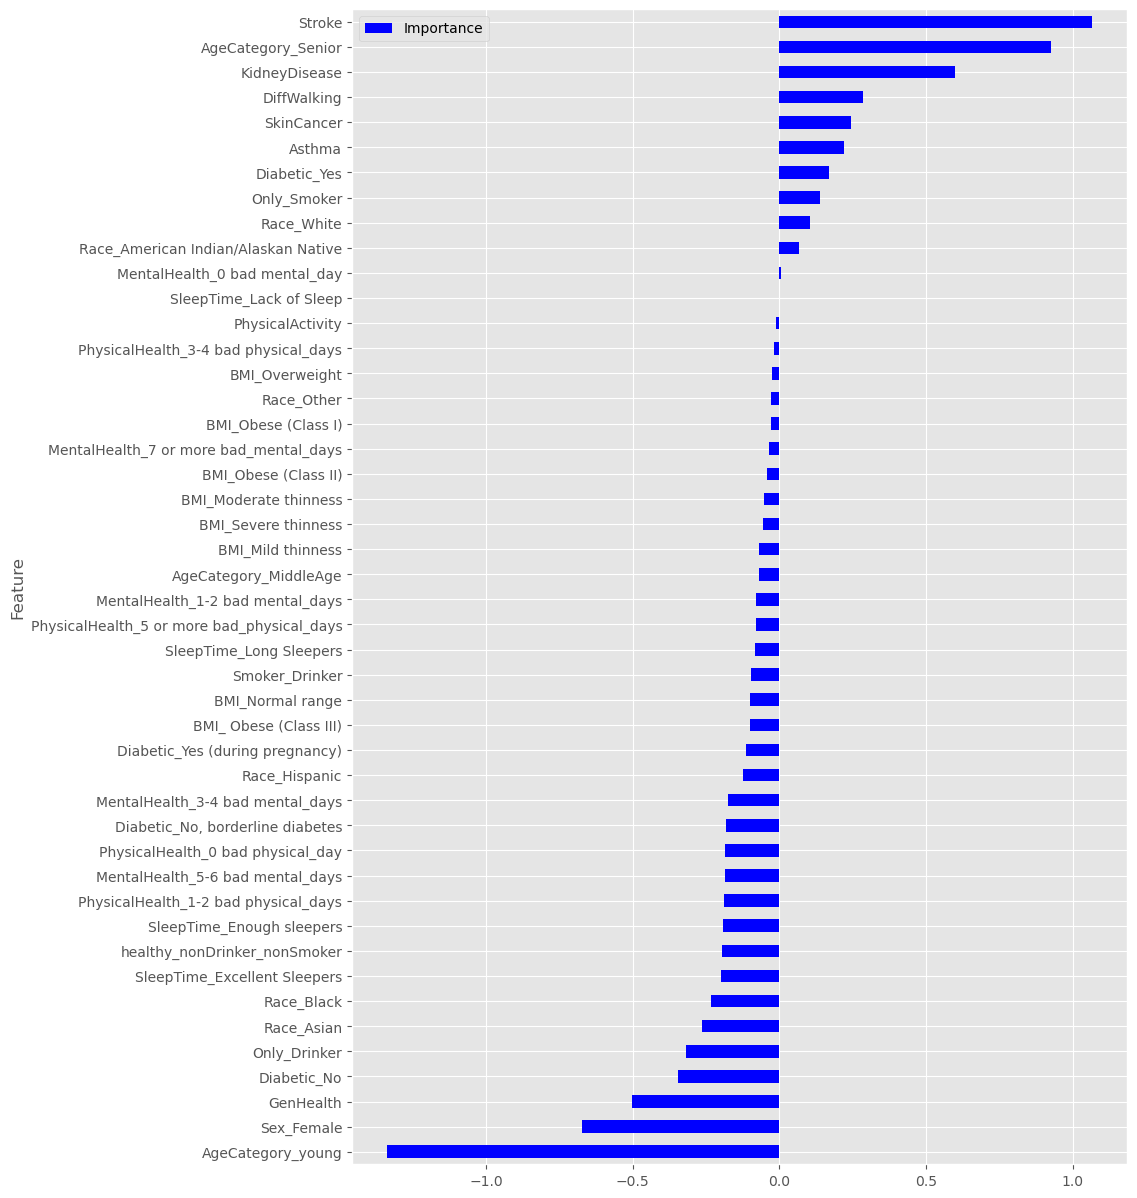

In [34]:

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 15), color='blue')

<Axes: ylabel='Feature'>

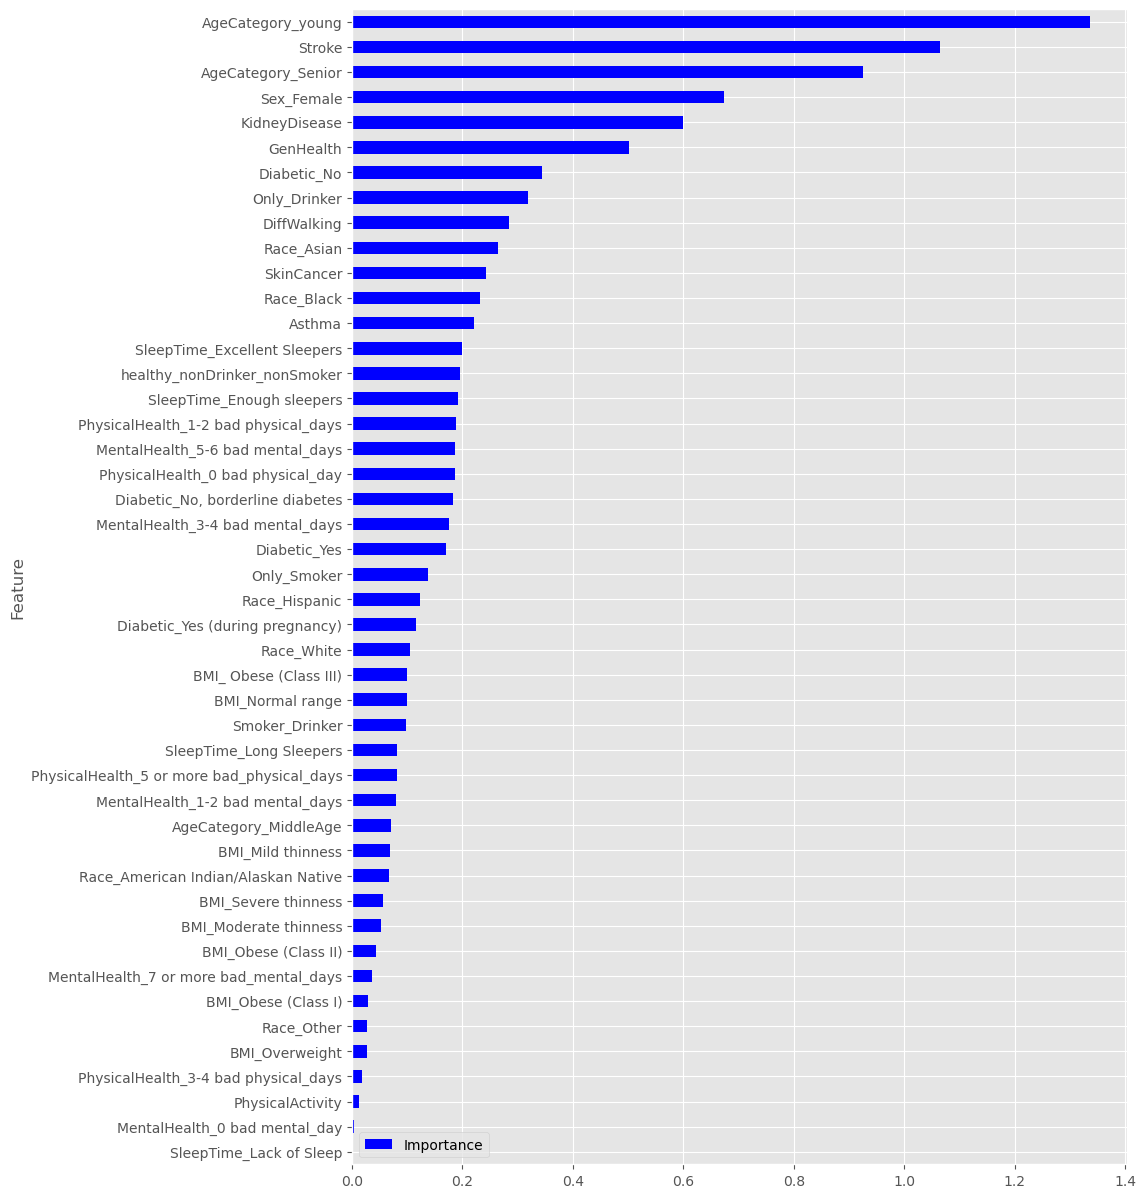

In [35]:
# let's see the importance based on the absolute value
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(feature_coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 15), color='blue')

Interesting insight: Age

In [36]:
# let's plot thesort based on absolute value but showing the real coeficient
abs_coeficients = np.abs(feature_coefficients )
feature_names = X_train.columns
sorted_indices = np.argsort(abs_coeficients)[::-1]
sorted_coefficients=feature_coefficients[sorted_indices]
sorted_feature_names =feature_names[sorted_indices]


In [37]:
sorted_coefficients

array([-1.33642725,  1.06465018,  0.92525999, -0.67355342,  0.59978979,
       -0.50120708, -0.34458041, -0.31896911,  0.28382876, -0.26384204,
        0.24341272, -0.23146426,  0.22155617, -0.19845998, -0.19593597,
       -0.19213764, -0.18874648, -0.18665185, -0.18640317, -0.18359969,
       -0.17578319,  0.169356  ,  0.13790238, -0.12267739, -0.11518479,
        0.10486182, -0.09924684, -0.09879625, -0.09700618, -0.08177366,
       -0.08093997, -0.08029632, -0.06976562, -0.06895073,  0.06629617,
       -0.05588277, -0.05185777, -0.04350443, -0.03526192, -0.02926524,
       -0.02718318, -0.02650485, -0.01791928, -0.01206623,  0.00398439,
       -0.00163762])

Text(0, 0.5, 'Absolute coffeifficient value')

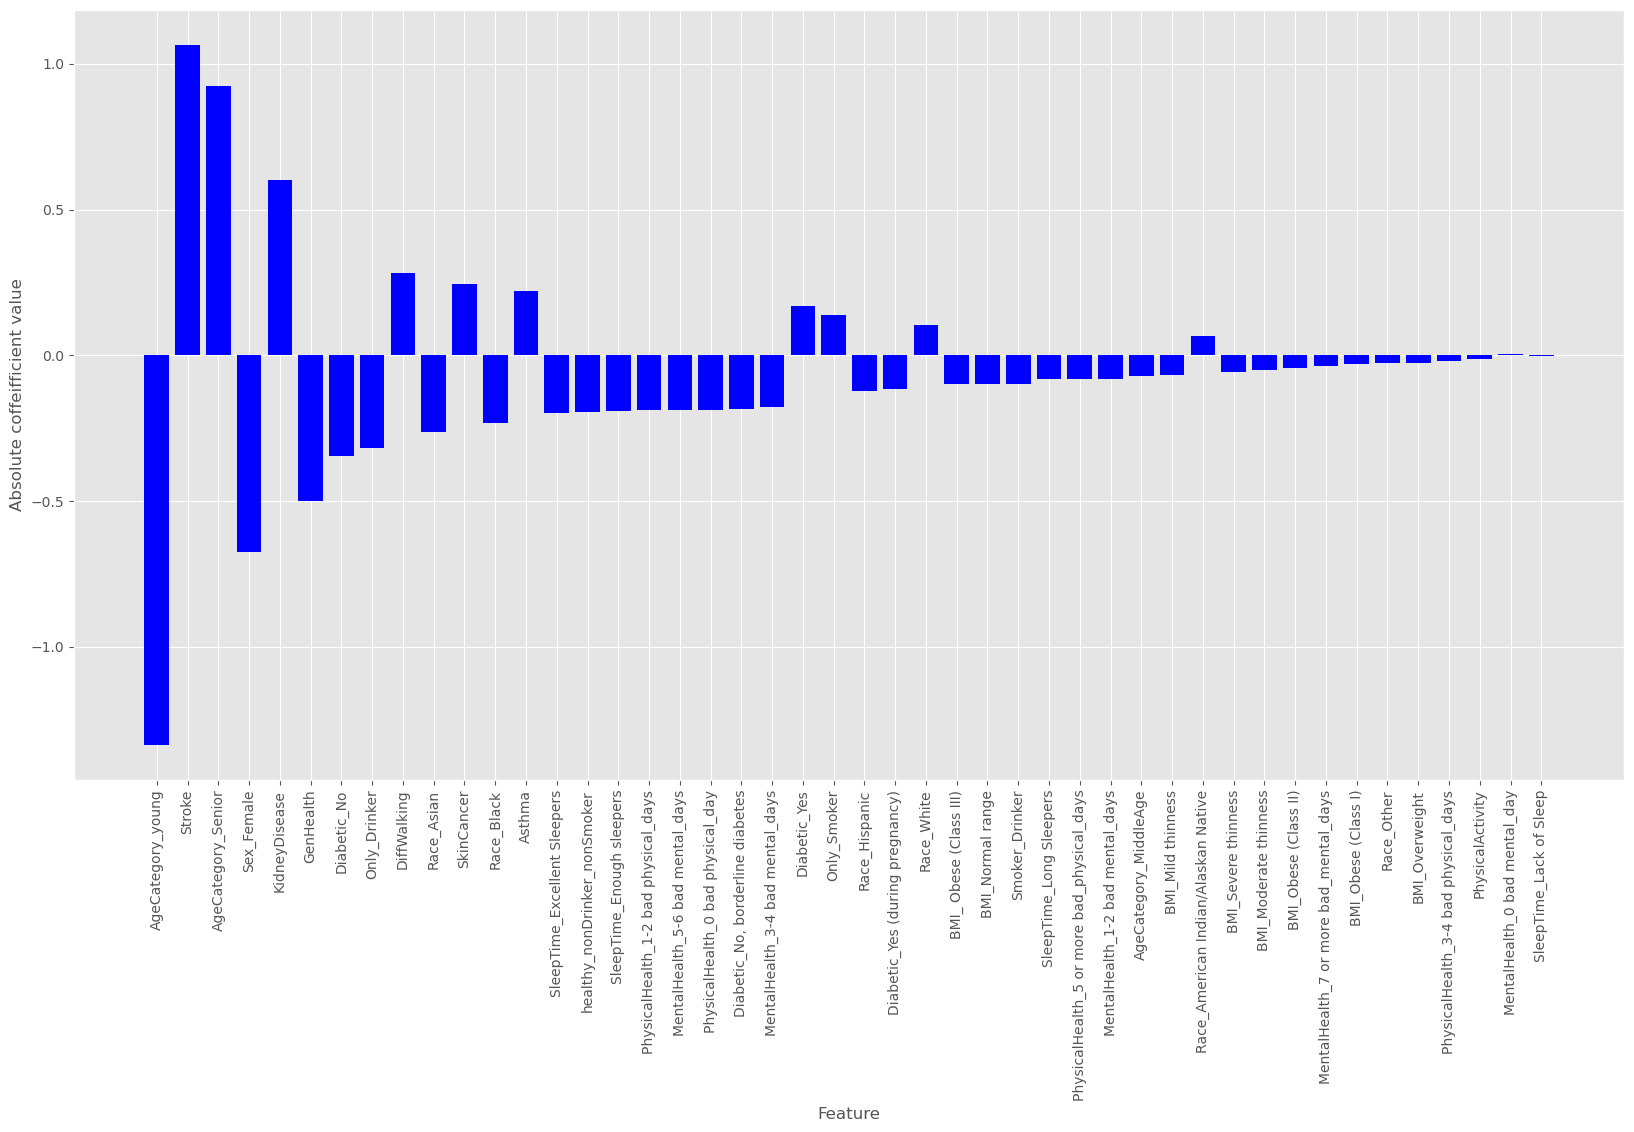

In [38]:
sorted_feature_names
plt.figure(figsize=(20,10))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients, align='center',color='blue')
plt.xticks(range(len(sorted_coefficients)),sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute coffeifficient value')


from the figures we can see that the most important feature for the model to determine the heart disease is agecategory_youn which has -1 relationship with heart disease and this is logical as the person is in the young group even if he/she has a bad lifestyle in young age people tend to not get heart disease.Then is stroke, as people in their older age tend to get stroke the most determine factor is Stroke with coefficient 1. this shows positive asssociation with positive class.The ratios are log-odds of the probability of the positive class.Then we have Age_category_senior, sex_female (if the person is female, she has less chance of getting heart disease), then kidney disease with positive correaltion, genhelath with negative correlation (as wgeneral health goes up the chance of getting heart disease decreases). These are the first 6 most important features based on the model. Now let's do some 

In [39]:
odds_ratios=np.exp(feature_coefficients)
odds_ratios

array([2.89982438, 1.32820547, 0.98800627, 0.60579897, 1.24801735,
       1.82173581, 1.27559498, 0.70851757, 0.83226891, 1.18454176,
       0.89120145, 0.50989349, 1.06854314, 0.76809486, 0.79337105,
       0.88454898, 0.97318295, 1.11055715, 0.94564999, 0.9494639 ,
       0.93337266, 0.90592727, 0.97384332, 0.97115884, 0.95742831,
       0.90551916, 0.82993892, 0.8279964 , 0.98224032, 0.92224906,
       1.00399234, 0.92284285, 0.83879982, 0.82973256, 0.96535254,
       0.99836372, 0.82519328, 0.81999259, 0.92148051, 0.90755039,
       1.14786349, 0.726898  , 0.82206487, 0.26278285, 0.93261238,
       2.522524  ])

 ### 4.3. Model Optimization <a class="anchor" id="variables_distribution"></a>


Let's do hyper parameter optimization

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# define the hyperparamete values
param_grid={'C':[0.001,1,100], 'solver':['liblinear','newton-cg']}
# GriSearchCV object
grid_search = GridSearchCV(model,param_grid,cv=5,scoring='f1',n_jobs=1)
grid_search.fit(X_train,y_train)
best_params= grid_search.best_params_
print('Best hyperparameters', best_params)

Best hyperparameters {'C': 100, 'solver': 'newton-cg'}


In [42]:
# We can see that the best parameters are : C:100 which gives less regulation and allowing the model to fit the training
# solve:newton-cg is the optimization algorithm used for logistic regression. In this case 'newton-cg' is the best algorithm to use in optimization problem
# newton-cg is newton-conjugate gradient optimization
best_solver='newton-cg'
model_opt_hyp = LogisticRegression(solver=best_solver)
model_opt_hyp.fit(X_train,y_train)
scores_OPT = cross_val_score(model_opt_hyp,X,y,cv=stratified_kfold,scoring='f1')
print('Cross-validation_Original F1 scores', scores_ORG)
print('Cross-validation_Optimized F1 scores', scores_OPT)


Cross-validation_Original F1 scores [0.17634093 0.16272189 0.18198563 0.1782505  0.16672828 0.17004795]
Cross-validation_Optimized F1 scores [0.17610294 0.16248154 0.18158379 0.17613532 0.16642012 0.17020491]


In [43]:
mean_opt = scores_OPT.mean()
mean_org=scores_ORG.mean()
print( 'mean f1 of original model',mean_org)
print( 'mean f1 of optimized model',mean_opt)

mean f1 of original model 0.1726791983416465
mean f1 of optimized model 0.17215476981778918


we can see a bit of decrease even in the performance so it seems that the base model performs better. let's try ensemble models.

let's pick the random forest and gradient boosting ensemble methods

In [44]:
# Random Forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [46]:
# Train
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Evaluation
scores_RF= cross_val_score(rf_model,X,y,cv=stratified_kfold,scoring='f1')
print('Cross-validation F1 scores', scores_RF)

Cross-validation F1 scores [0.17191123 0.16909914 0.18424121 0.17862469 0.1614514  0.17434373]


In [48]:
print('Cross-validation_Regression_mode_Original F1 scores', scores_ORG)

print('Cross-validation_Optimized F1 scores', scores_OPT)
print('Random forrest cross validation scores:', scores_RF)

Cross-validation_Regression_mode_Original F1 scores [0.17634093 0.16272189 0.18198563 0.1782505  0.16672828 0.17004795]
Cross-validation_Optimized F1 scores [0.17610294 0.16248154 0.18158379 0.17613532 0.16642012 0.17020491]
Random forrest cross validation scores: [0.17191123 0.16909914 0.18424121 0.17862469 0.1614514  0.17434373]


In [49]:
mean_score_Rf= scores_RF.mean()

print( 'mean f1 of regression original model',mean_org)
print( 'mean f1 of optimized model',mean_opt)
print('mean of random forrest model',mean_score_Rf)

mean f1 of regression original model 0.1726791983416465
mean f1 of optimized model 0.17215476981778918
mean of random forrest model 0.1732785680032938


We saw that the random forrest was the best performance among all the other. Let's see how gradient boosting perform

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [51]:
xgb_model= XGBClassifier(n_estimators=100,random_state=42)

In [52]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [53]:
# Evaluation
scores_xgb= cross_val_score(xgb_model,X,y,cv=stratified_kfold,scoring='f1')
scores_xgb_mean=scores_xgb.mean()
print('Cross-validation F1 scores for XGradientBooster', scores_xgb)

Cross-validation F1 scores for XGradientBooster [0.14856712 0.14907998 0.1645119  0.15263749 0.15831626 0.15113445]


The performance of xgradient booset is the lowest

### 5.1. Model Selection and Evaluation <a class="anchor" id="variables_distribution"></a>

Based on the results on test data I would go with random forest model but in reality still need to do more hyperparameter optimization.

In [54]:
print( 'mean f1 of regression original model',mean_org)
print( 'mean f1 of optimized model',mean_opt)
print('mean of random forrest model',mean_score_Rf)
print('Cross-validation F1 scores for XGradientBooster', scores_xgb_mean)

mean f1 of regression original model 0.1726791983416465
mean f1 of optimized model 0.17215476981778918
mean of random forrest model 0.1732785680032938
Cross-validation F1 scores for XGradientBooster 0.15404119901494023


Now let's test the random forrest model on validation set

In [55]:
rf_model_validation = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_validation.fit(X_val, y_val)
scores_rf_val= cross_val_score(rf_model_validation,X,y,cv=stratified_kfold,scoring='f1')
print('Cross-validation F1 scores', scores_rf_val)
mean_rf_val_score=scores_rf_val.mean()
print('Mean F1 scores', mean_rf_val_score)

Cross-validation F1 scores [0.17191123 0.16909914 0.18424121 0.17862469 0.1614514  0.17434373]
Mean F1 scores 0.1732785680032938


It seems that the model is doing well in terms of genralization.If I had time, I would have done some hyperparameter optimization and feature engineering to improve the model performance. For now let's do the calibration to see how well it will boost the performance of our model

In [56]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model_cal=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model_cal.fit(X_train,y_train)
calibrated_model=CalibratedClassifierCV(rf_model_cal,method='sigmoid',cv='prefit')
calibrated_model.fit(X_train,y_train)
calibrated_rf_preds=calibrated_model.predict(X_test)
f1_score_validation_cal=f1_score(y_test,calibrated_rf_preds)
calibrated_rf_val_preds=calibrated_model.predict(X_val)
f1_score_val=f1_score(y_val,calibrated_rf_val_preds)

In [58]:
print('The score before calibration using random forrest with validation set:',mean_rf_val_score)
print('The calibrated model performance:',f1_score_val)


The score before calibration using random forrest with validation set: 0.1732785680032938
The calibrated model performance: 0.24065492740191535


Now we can see that the performance is increased from 17.55% to 24.93%.
Next things we can do : evaluate other models and optimize each by using ensemble and hyperparameter adjustment methods.